**COMENTARIO:** Para correr sin problema este módulo, se debe repasar la *Guia_Introductoria.ipynb*, que usaron en el primer corte.


# Modelo de Transporte Químico Regional WRF-Chem

**ANALISIS DE DATOS DE SALIDA DEL MODELO WRF-Chem**

Los archivos de salida del modelo WRF-Chem son archivos en tres dimensiones latitud (x), longitud (y), altura (z), y adicionalmente son datos que están en el tiempo (t). El formato de salida se llama NetCDF (Network Common Data Form), y es un formato de datos para almacenar de una manera eficiente gran cantidad de datos geograficos tridimensionales como variables meteorologicas (temperatura, velocidad y dirección del viento, presión atmosferica, topografia, etc.) que varian en el tiempo.

Si quiere investigar más sobre los archivos NetCDF, dirijase a: https://climatedataguide.ucar.edu/climate-data-tools-and-analysis/netcdf-overview



**Acceder a los archivos de Google Drive**

Para poder usar los archivos de salida del modelo WRF que vamos analizar para este taller, primero deben subir los archivos en una carpeta que esté en el drive. Cuando se realizó la instalación de Colab, en el drive de cada uno se debió crear una carpeta que se llama **"*Colab Notebooks*"**, verifique que si tenga esta carpeta en su Drive.

Trate de mantener todos los Notebooks de los códigos de Colab y los archivos que vamos a usar dentro de esta carpeta.

Dentro de la carpeta **"*Colab Notebooks*"**, cree una carpeta que se llamé **"*Taller_WRF*"** y coloqué este código. Después y también en la carpeta **"*Taller_WRF*"** suba la carpeta **"*data*"** con los archivos para este taller.

Para poder acceder desde este código a los archivos de la carpeta **"*data*"** debe correr las siguientes líneas. Donde se creará un acceso directo a los archivos que están en Google Drive desde Colab.

```
from google.colab import drive
drive.mount("/gdrive")
```

Después de correr las líneas, el computador arrojará un link al cual debe acceder, este link es para darle permiso de acceso al código de Colab. Este link lo dirigirá a una página para iniciar sesión en su gmail, y después que usted ingrese su usuario y contraseña, le indicará un código el cual debe pegar en el renglón del código que aparece justo después de correr las líneas de acceso, donde se pregunta por un código.

De esa manera, ya tendrá acceso a los archivos del drive. Sin embargo, cada vez que cierre y abra el código o cualquier código de Colab donde necesite acceso a los archivos ubicados en el drive, debe realizar este proceso. El acceso que se da por medio de este método es temporal.

La dirección de ubicación de su carpeta debe ser:

**/gdrive/My Drive/Colab Notebooks/Taller_WRF/data/**


In [1]:
from google.colab import drive
drive.mount("/gdrive")

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


## ¿Cómo leer los archivos NetCDF de salida de WRF-Chem?

Recuerden que el lenguaje de programación que estamos usando para este taller es Python. Google colaboratory es la interfaz para programar en Python.


# **1. Primero**

Lo primero que debemos hacer es llamar a la librería que permite leer los archivos NetCDF. La librería se llama `netCDF4` y para llamar cualquier librería se usa la palabra `import`.

```
import netCDF4
```

Dentro de la librería `netCDF4` se encuentran muchas funciones. (E.g. Imaginemos que en nuestro computador, el lenguaje de programación es Excel. Excel a su vez tiene muchas funciones que podemos usar, aunque tienen funciones diferentes, mantienen unas características similares como la celda que queremos usar para hacer una multiplicación, etc).

La librería `netCDF4` también tiene muchas funciones y la función que necesitamos para **leer** el archivo con los datos de salida del modelo se llama `Dataset`.

Y para hacer un uso eficiente de la memoria del servidor que nos presta google, podemos únicamente llamar la función que requerimos de la librería de la siguiente manera:

```
from netCDF4 import Dataset
```

In [2]:
!pip install netCDF4
from netCDF4 import Dataset

# **2.   Segundo**

Después de llamar la librería y función para leer el archivo NetCDF se debe proceder abrir el archivo. El archivo que contiene los datos de salida del modelo se llama **"*datos_taller_wrf_FIRE.nc*"** y debe estar ubicado en la carpeta **"*data*"** que a su vez debe estar en la carpeta **"*Taller_WRF*"**...

Si la ubicación es correcta, la línea para poder acceder al archivo es:

```
datos = Dataset("/gdrive/My Drive/Colab Notebooks/Taller_WRF/data/datos_taller_wrf.nc")
```

Los datos del archivo quedarán guardados en la variable **"datos"**.

Luego de correr estas líneas sin que arroje error, usted ya podra ver los datos que contiene el archivo.

In [4]:
from netCDF4 import Dataset

datos = Dataset("/gdrive/My Drive/METEOROLOGIA/Taller_WRF/data/wrfout_d04_2025-03-18.nc")

# Archivos NetCDF

Los archivos NetCDF están organizados en variables y cada varaible tiene asociada las dimensiones en las que tiene los resultados de simulación.

Las variables que encontraran las pueden visualizar con el comando:

```
datos.variables.keys()
```

Este archivo cuenta con 15 variables, entre las variables con las que vamos a trabajar en el taller es Temperatura **'T2'**, concentraciones de Material Particulado fino PM2.5 **'PM2_5_DRY'** y las variables de dirección y velocidad del viento, que no son calculadadas directamente por el modelo, pero el modelo si arroja las componentes horizontales y verticales del viento y los angulos con respecto a la ubicación de la tierra, es por eso que se tienen otras variables como **'COSALPHA', 'P', 'SINALPHA', 'U', 'V'** que nos ayudaran a calcular la dirección y velocidad del viento en cada grilla para poder hacer el mapa de vientos y la rosa de vientos.


In [5]:
# Linea de código
datos.variables.keys()

dict_keys(['Times', 'XLAT', 'XLONG', 'LU_INDEX', 'ZNU', 'ZNW', 'ZS', 'DZS', 'VAR_SSO', 'U', 'V', 'W', 'PH', 'PHB', 'T', 'HFX_FORCE', 'LH_FORCE', 'TSK_FORCE', 'HFX_FORCE_TEND', 'LH_FORCE_TEND', 'TSK_FORCE_TEND', 'MU', 'MUB', 'NEST_POS', 'P', 'PB', 'FNM', 'FNP', 'RDNW', 'RDN', 'DNW', 'DN', 'CFN', 'CFN1', 'THIS_IS_AN_IDEAL_RUN', 'P_HYD', 'Q2', 'T2', 'TH2', 'PSFC', 'U10', 'V10', 'RDX', 'RDY', 'RESM', 'ZETATOP', 'CF1', 'CF2', 'CF3', 'ITIMESTEP', 'XTIME', 'QVAPOR', 'QCLOUD', 'QRAIN', 'SHDMAX', 'SHDMIN', 'SNOALB', 'TSLB', 'SMOIS', 'SH2O', 'SMCREL', 'SEAICE', 'XICEM', 'SFROFF', 'UDROFF', 'IVGTYP', 'ISLTYP', 'VEGFRA', 'GRDFLX', 'ACGRDFLX', 'ACSNOM', 'SNOW', 'SNOWH', 'CANWAT', 'SSTSK', 'COSZEN', 'LAI', 'VAR', 'MAPFAC_M', 'MAPFAC_U', 'MAPFAC_V', 'MAPFAC_MX', 'MAPFAC_MY', 'MAPFAC_UX', 'MAPFAC_UY', 'MAPFAC_VX', 'MF_VX_INV', 'MAPFAC_VY', 'F', 'E', 'SINALPHA', 'COSALPHA', 'HGT', 'TSK', 'P_TOP', 'T00', 'P00', 'TLP', 'TISO', 'TLP_STRAT', 'P_STRAT', 'MAX_MSTFX', 'MAX_MSTFY', 'RAINC', 'RAINSH', 'RAINNC',

Para ver las caracteristicas de cada variable se puede usar la líne de comando siguiente:

```
datos.variables['T2']
```

In [7]:
# Si quiere ver las características de las otras variables como 'T2' cambie la variable dentro del paréntesis cuadrado de la línea de comando.

datos.variables['T2'][24,52,49]

masked_array(data=285.5639,
             mask=False,
       fill_value=np.float64(1e+20),
            dtype=float32)

In [8]:
datos.variables['T2']

<class 'netCDF4.Variable'>
float32 T2(Time, south_north, west_east)
    FieldType: 104
    MemoryOrder: XY 
    description: TEMP at 2 M
    units: K
    stagger: 
    coordinates: XLONG XLAT XTIME
unlimited dimensions: Time
current shape = (121, 66, 66)
filling on, default _FillValue of 9.969209968386869e+36 used

**Los datos que puede observar de cada variable son:**

`<class 'netCDF4._netCDF4.Variable'> ` - Tipo de archivo netCDF versión 4

`float32 T2(Time, south_north, west_east)` - Esta línea es muy importante entenderla, pues muestra las dimensiones que tiene la variable, en este caso la variable **'T2'** tiene las dimesiones tiempo **Time**, latitud **south_north**, y longitud **west_east**.

```
FieldType: 104
MemoryOrder: XY
description: TEMP at 2 M
```
`units: K` - Las unidades de la variable. En el ejemplo de la variable temperatura nos dice que tiene unidades de grado Kelvin.

`stagger: `

`coordinates: XLONG XLAT XTIME`

`unlimited dimensions: Time`

`current shape = (121, 66, 66)` - La característica **Shape** también es muy importante dado que indica cuántas unidades de las dimensiones de la variable tiene. Los valores que aparecen están ubicados en el mismo orden que se muestra en la línea `float32 T2(Time, south_north, west_east)`, en el caso de la variable temperatura quiere decir que tiene 121 tiempos, 66 celdas en latitud y 66 celdas en longitud.

`filling on, default _FillValue of 9.969209968386869e+36 used`

In [9]:
print("Dimensiones: ", datos.variables['T2'].dimensions)
print("Shape: ", datos.variables['T2'].shape)
print("Unidades: ", datos.variables['T2'].units)

Dimensiones:  ('Time', 'south_north', 'west_east')
Shape:  (121, 66, 66)
Unidades:  K


**Datos en el dominio 4 - D04**

Recuerde que los datos que se están usando son resultado del dominio 3 mostrado en la presentación del modelo. Esto quiere decir que el dominio está ubicado en el centro de Colombia, donde se encuentran datos de departamentos como Cundinamarca, Boyacá, y algunas partes de otros departamentos. Y la resolución espacial del dominio es de 66 celdas x 66 celdas y cada celda tiene una resolución de 1 km x 1 km.

Las dimensiones y el shape de cada variable permiten ubicar datos especificos de interes. Para los datos de los archivos resultantes del dominio 4 se esperará encontrar 66 valores en la dimensión latitud, 66 valores en la dimesión longitud y dependiento de las fechas de simulación un número relacionado con los pasos de tiempo, el periodo de simulación es 18 de marzo del 2025 a las 00:00 horas UTC al 23 de marzo del 2025 a las 00:00 horas, con registros cada hora Time shape = 121 horas.

```
datos.variables['T2'][24,58,57]
```
Después de especificar la variable dentro del primer parentésis cuadrado **['T2']** se debe indicar la ubicación en tiempo, latitud y longitud del dato de interes dentro de parentésis cuadrado **[ ]** cada dimensión separada por una coma **(,)**.

En el ejemplo se indica **[24,58,57]**

**24**: significa el tiempo 24. Como el archivo empieza el 18 de marzo del 2025 a las 00:00 horas 24 horas despues es el 19 de marzo del 2025 a las 00:00

**58**: indica el número de la celda en la dimensión latitud donde se encuentra ubicado el centro de Bogotá.

**57** indica el número de la celda en la dimensión longitud donde se encuentra ubicado el centro de Bogotá.

El resultado que arroja esta línea debe ser `data=285.15332`, esto significa que la temperatura en el centro de Bogotá el 18 de marzo del 2025 a las 00:00 horas es de 285.15 grados Kelvin.

In [11]:
datos.variables['T2'][24,58,57]

masked_array(data=285.15332,
             mask=False,
       fill_value=np.float64(1e+20),
            dtype=float32)

In [12]:
# Si queremos saber las temperaturas durante todo el día del 18 de marzo de 2025:

datos.variables['T2'][0:24,58,47]

# El resultado no va ser un unico dato. Se imprimiran las temperaturas en orden desde las 19:00 horas del 11 de marzo hasta las 19:00 del 12 de marzo.
# Esto es lo que se conoce en programación como un array. Un array es un arreglo de datos ordenados

masked_array(data=[283.15283, 280.718  , 281.0399 , 279.93073, 280.2961 ,
                   280.16095, 280.19095, 279.3192 , 281.91437, 279.7322 ,
                   281.875  , 281.278  , 282.5219 , 284.21017, 285.353  ,
                   286.95004, 288.17926, 289.45673, 287.8404 , 287.9547 ,
                   287.6889 , 285.00006, 284.8831 , 283.96527],
             mask=False,
       fill_value=np.float64(1e+20),
            dtype=float32)

In [13]:
# Si queremos pasar estas temperaturas en grados kelvin a grados centigrados, se pueden usar operaciones simples con los arrays.
#E.g. restar -273,15 grados.

print("Temperatura en °C a las 19:00 horas el 12/03/2020:", datos.variables['T2'][24,58,57]-273.15)

print("Temperatura en °C durante todo el día el 12/03/2020:", datos.variables['T2'][5:29,58,57]-273.15)


Temperatura en °C a las 19:00 horas el 12/03/2020: 12.003320312500023
Temperatura en °C durante todo el día el 12/03/2020: [ 8.93737183  9.7546936   7.46355591  7.55413208  8.4074646   9.72960815
  8.69963989  9.81072388 12.30123291 14.74175415 16.12593994 17.29784546
 18.32698975 19.05974731 15.99315796 15.56398926 13.30446777 13.4977356
 12.99068604 12.00332031 11.80962524 10.90224609 11.68770752 11.82372437]


**Hacer Promedios con los Arreglos de Datos**

Si queremos hacer funciones un poco más complicadas como por ejemplo promedios, se deben llamar otras librerías que permitan hacer este tipo de procesos.

La librería que vamos a usar es `numpy`. Esta librería permite hacer muchas operaciones con arreglos de datos.

Recordemos que para llamar la librería se usa la palabra `import`:

```
import numpy
```

In [17]:
#!pip install numpy==1.23
import numpy

# Promedio de temperatura del 12 de marzo de 2020 en grados centigrados
print("Promedio de Temperatura del 18 de marzo de 2025 en °C")
print(numpy.mean(datos.variables['T2'][:24,58,57]) - 273.15)


# El promedio de la temperatura en todo el dominio D03 en grados centigrados
print("Promedio de Temperatura del 18 de marzo de 2025 en °C para todo el dominio")
print(numpy.mean(datos.variables['T2'][:24,:,:]) - 273.15)

# Para tomar un rando de datos en alguna de las dimensiones los valores se deben colocar separados con :

Promedio de Temperatura del 18 de marzo de 2025 en °C
11.861938
Promedio de Temperatura del 18 de marzo de 2025 en °C para todo el dominio
11.499786


In [11]:
from datetime import datetime
import pandas

# Función para lear las fechas UTC y pasarlas a horario local.
def fechas_wrffile(wrf_file):
  datos_fechas = wrf_file.variables['Times'][:,:]
  fechas_limpias = []
  for raw in datos_fechas:
      fecha_str = b''.join(raw).decode('utf-8').replace('_', ' ')
      fecha = datetime.strptime(fecha_str, "%Y-%m-%d %H:%M:%S")
      fechas_limpias.append(fecha)
  fechas_locales = pandas.to_datetime(fechas_limpias) - pandas.Timedelta(hours=5)
  return fechas_locales

Fechas = fechas_wrffile(datos)
#print(Fechas[:])
print('Primera y última fecha del archivo hora Bogotá:')
print(Fechas[0], '--', Fechas[-1])

Primera y última fecha del archivo hora Bogotá:
2025-03-17 19:00:00 -- 2025-03-22 19:00:00


# Graficar los datos

Para graficar los datos de salida del modelo, se necesitan las librerias `mpl_toolkits` y `matplotlib.pyplot`, al igual que la librería `wrf-python`, estas librerias no están instaladas en el sistema y se deben instalar. Recuerde que estas instalaciones son temporales y cada vez que abra el Script se deben cargar.


# Mapa de Temperatura en todo el dominio D03

En el siguiente código vamos a graficar el promedio de la temperatura en todo el dominio D03.

En la líne: `df = numpy.mean(datos.variables['T2'][0:816,0:132,0:132], axis=0)-273.15` Se están definiendo haciendo el promedio de los tiempos y se estan convirtiendo a grados centigrados.

Text(0.5, 1.0, 'Temperatura [°C]')

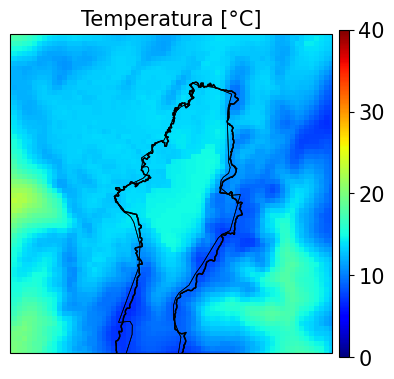

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from netCDF4 import Dataset

# Carga de datos WRF

datos = Dataset('/gdrive/My Drive/METEOROLOGIA/Taller_WRF/data/wrfout_d04_2025-03-18.nc')

# Extraer coordenadas y temperatura promedio en °C
lons = datos.variables['XLONG'][0, :, :]
lats = datos.variables['XLAT'][0, :, :]
t2 = datos.variables['T2'][:,:,:]  # (tiempo, y, x)
df = np.mean(t2, axis=0) - 273.15  # promedio temporal y conversión a °C

# Crear figura
fig = plt.figure(figsize=(5, 5))
ax = plt.axes(projection=ccrs.Mercator())
ax.set_extent([lons.min(), lons.max(), lats.min(), lats.max()], crs=ccrs.PlateCarree())

# Malla de coordenadas
lon2d, lat2d = np.meshgrid(lons[0, :], lats[:, 0])  # adaptado a malla 2D

# Graficar los datos
c = ax.pcolormesh(lon2d, lat2d, df, cmap='jet', vmin=0, vmax=40, transform=ccrs.PlateCarree())

# Agregar capas geográficas
ax.coastlines(resolution='10m')
ax.add_feature(cfeature.BORDERS, linewidth=1)
ax.add_feature(cfeature.STATES.with_scale('10m'), linewidth=0.5)

# Agregar shapefile (si tienes shapefile de Colombia)
import cartopy.io.shapereader as shpreader
from cartopy.feature import ShapelyFeature
import shapefile  # pyshp
import os

shapefile_path = "/gdrive/My Drive/METEOROLOGIA/Taller_WRF/data/Colombia_Depart"
shape_reader = shpreader.Reader(shapefile_path)
shape_feature = ShapelyFeature(shape_reader.geometries(), ccrs.PlateCarree(), edgecolor='black', facecolor='none', linewidth=1)
ax.add_feature(shape_feature)

# Colorbar y título
cb = plt.colorbar(c, orientation='vertical', shrink=0.85, pad=0.02, aspect=35)
cb.ax.tick_params(labelsize=15)
plt.title("Temperatura [°C]", fontsize=15)


# Mapa de Temperatura con la ubicación de las estaciones de monitoreo

Para colocar las estaciones de monitoreo necesitamos saber donde están ubicadas.
La ubicación de las estaciones la encuentran en el archivo de Excel **"EstacionesBogota.xlsx"** en la primera hoja que tiene el archivo que se llama **"Ubic_Estaciones"**.

Para abrir el archivo Excel

In [12]:
import pandas as pd
# Llamar el archivo de excel y la hoja donde están los datos de ubicación de las estaciones de monitoreo
Estaciones = pd.read_excel('/gdrive/My Drive/METEOROLOGIA/Taller_WRF/data/EstacionesBogota.xlsx', sheet_name='Ubic_Estaciones', index_col=False, header=0)
UBI_ESTACIONES = Estaciones.set_index('ESTACIONES')
print(UBI_ESTACIONES)

            NUMERO   LATITUD   LONGITUD  XLAT_d03  XLONG_d03
ESTACIONES                                                  
Carvajal        CV  4.595616 -74.148583        49         48
CentAltoRen     CA  4.658467 -74.083966        52         51
Guaymaral       GU  4.783756 -74.044183        56         52
Kennedy         KE  4.621667 -74.161333        50         48
LasFerias       LF  4.690700 -74.082483        53         51
PuentAranda     PA  4.631767 -74.117483        51         50
SanCrist        SC  4.572553 -74.083813        48         51
Suba            SU  4.761247 -74.093461        55         50
Tunal           TU  4.576225 -74.130955        49         49
Usaquen         US  4.710350 -74.030417        54         53
Movil7ma        M7  4.645361 -74.061679        51         52
Fontibon        FO  4.670121 -74.141361        52         49
MinAmb          MA  4.625385 -74.067185        50         51


In [13]:
#******************************
# Modifique el nombre de la estación tal cual esta en la tabla de excel anterior dentro de las comillas.
nombre_estacion = "Fontibon"
#*****************************

latitud = UBI_ESTACIONES.loc[nombre_estacion]['LATITUD']
longitud = UBI_ESTACIONES.loc[nombre_estacion]['LONGITUD']

print(latitud, longitud)

4.670121 -74.141361


Text(0.5, 1.0, 'Temperatura [°C]')

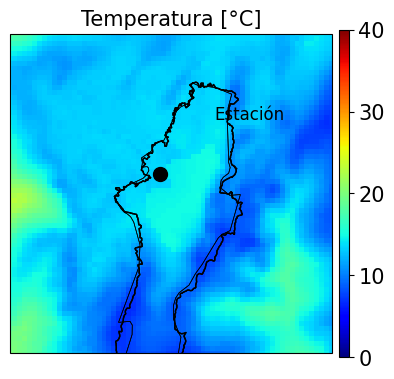

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from netCDF4 import Dataset

# Carga de datos WRF

datos = Dataset('/gdrive/My Drive/METEOROLOGIA/Taller_WRF/data/wrfout_d04_2025-03-18.nc')

# Extraer coordenadas y temperatura promedio en °C
lons = datos.variables['XLONG'][0, :, :]
lats = datos.variables['XLAT'][0, :, :]
t2 = datos.variables['T2'][:,:,:]  # (tiempo, y, x)
df = np.mean(t2, axis=0) - 273.15  # promedio temporal y conversión a °C

# Crear figura
fig = plt.figure(figsize=(5, 5))
ax = plt.axes(projection=ccrs.Mercator())
ax.set_extent([lons.min(), lons.max(), lats.min(), lats.max()], crs=ccrs.PlateCarree())

# Malla de coordenadas
lon2d, lat2d = np.meshgrid(lons[0, :], lats[:, 0])  # adaptado a malla 2D

# Graficar los datos
c = ax.pcolormesh(lon2d, lat2d, df, cmap='jet', vmin=0, vmax=40, transform=ccrs.PlateCarree())

ax.plot(longitud, latitud, marker='o', color='black', markersize=10,
        transform=ccrs.PlateCarree(), label="Estación de monitoreo")

# (Opcional) agregar etiqueta al punto
ax.text(longitud + 0.1, latitud + 0.1, "Estación", fontsize=12,
        transform=ccrs.PlateCarree(), color='black')

# Agregar capas geográficas
ax.coastlines(resolution='10m')
ax.add_feature(cfeature.BORDERS, linewidth=1)
ax.add_feature(cfeature.STATES.with_scale('10m'), linewidth=0.5)

# Agregar shapefile (si tienes shapefile de Colombia)
import cartopy.io.shapereader as shpreader
from cartopy.feature import ShapelyFeature
import shapefile  # pyshp
import os

shapefile_path = "/gdrive/My Drive/METEOROLOGIA/Taller_WRF/data/Colombia_Depart"
shape_reader = shpreader.Reader(shapefile_path)
shape_feature = ShapelyFeature(shape_reader.geometries(), ccrs.PlateCarree(), edgecolor='black', facecolor='none', linewidth=1)
ax.add_feature(shape_feature)

# Colorbar y título
cb = plt.colorbar(c, orientation='vertical', shrink=0.85, pad=0.02, aspect=35)
cb.ax.tick_params(labelsize=15)
plt.title("Temperatura [°C]", fontsize=15)
